In [1]:
# Import all the important libraries first. 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
fruits = pd.read_table('fruit_data_with_colors.txt')
# Check out the data
fruits.head()



,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [18]:
fruits.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [27]:
fruits['fruit_name']

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

In [30]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [52]:
lem = fruits[fruits['fruit_name']=='lemon']
lem

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
48,4,lemon,spanish_belsan,174,7.3,10.1,0.72
49,4,lemon,unknown,132,5.8,8.7,0.73
50,4,lemon,unknown,130,6.0,8.2,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
52,4,lemon,unknown,118,5.9,8.0,0.72


In [2]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [3]:
fruits.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

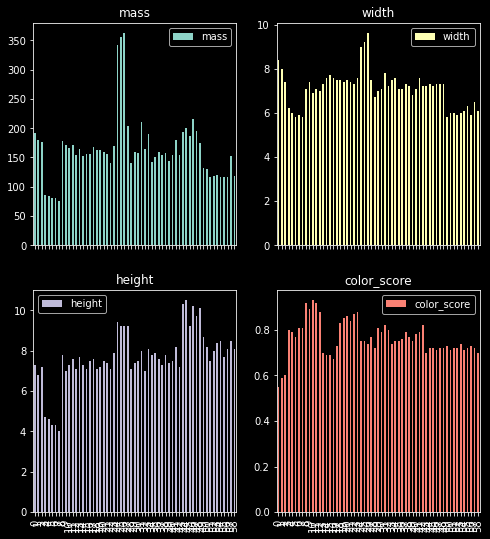

In [5]:
style.use('dark_background')
fruits.drop(['fruit_label'], axis=1).plot(kind='bar', layout=(2,2),figsize=(8,9), subplots=True, sharey = False)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48207b54d0>,
      dtype=object)

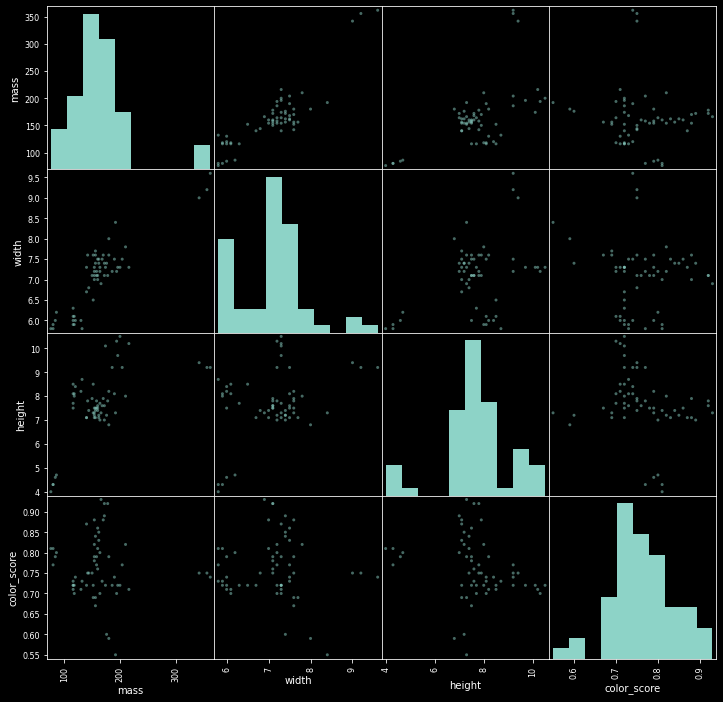

In [7]:
attr = ['mass','width','height','color_score']
scatter_matrix(fruits[attr], figsize=(12,12))

In [11]:
X = fruits[['mass','width', 'height']]
y = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


In [13]:
Y_train

42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

In [14]:
error_rate = []
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
print(error_rate)

[0.4, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.6666666666666666, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333]


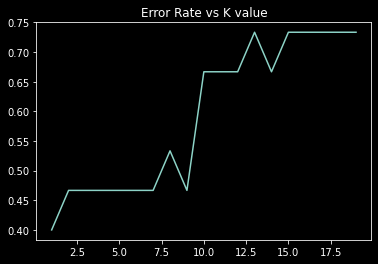

In [15]:
plt.plot(range(1,20), error_rate)
plt.title('Error Rate vs K value')
plt.show()

Failed Pred

In [36]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
fruit_prediction = knn.predict([[250, 3, 1.7]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'apple'

Success Prediction


In [37]:
#Apply k nearest algorithm
from sklearn.neighbors import KNeighborsClassifier
k=3
model = KNeighborsClassifier(n_neighbors=k,p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
prediction = model.predict([[100,7.2,5.7]])
lookup_fruit_name[prediction[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'lemon'